In [5]:
# Question 2,  (1+2)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Pandas automatically uses some pyplot functions, so we need it loaded
import seaborn as sns

df = pd.read_csv('./data/college_completion.csv',low_memory=False)

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print("df.shape:")
print(df.shape, '\n')

print("df.dtypes:")
print(df.dtypes, '\n')

print("df.columns:")
print(df.columns, '\n')

df.head()

df.shape:
(3798, 63) 

df.dtypes:
index                int64
unitid               int64
chronname           object
city                object
state               object
                    ...   
state_sector_ct      int64
carnegie_ct          int64
counted_pct         object
nicknames           object
cohort_size        float64
Length: 63, dtype: object 

df.columns:
Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [ ]:
# Question 2, (3)

print(pd.crosstab(df["control"], df["level"]))

# There are a lot more 4 year, private not for profit schools. In general, there are more 4 year schools. 

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


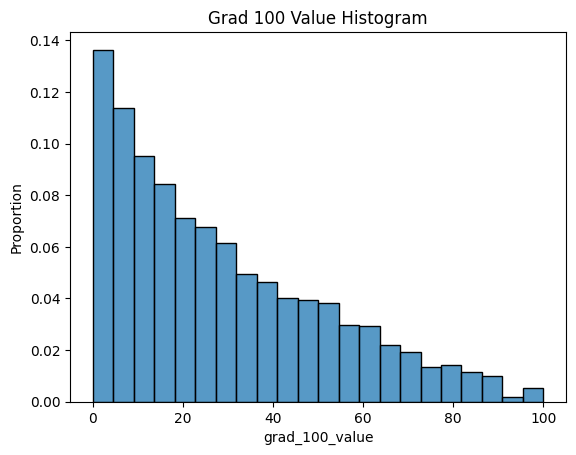

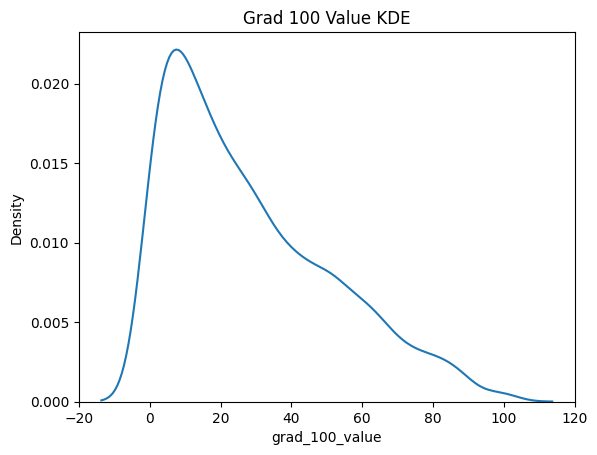

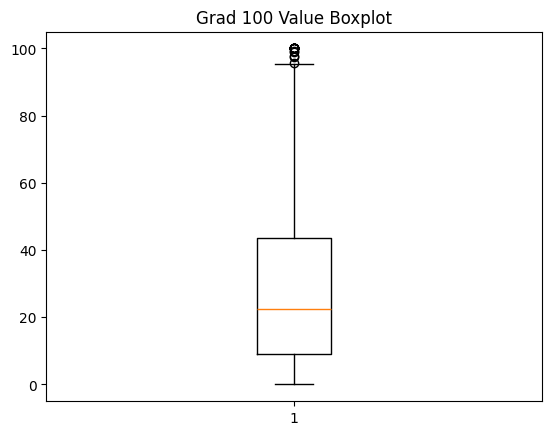

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

In [ ]:
# Question 2, (4)

grad_100 = pd.to_numeric(df["grad_100_value"], errors="coerce").dropna()

sns.histplot(grad, stat='proportion')
plt.title("Grad 100 Value Histogram")
plt.show()

sns.kdeplot(grad)
plt.title("Grad 100 Value KDE")
plt.show()

plt.boxplot(grad)
plt.title("Grad 100 Value Boxplot")
plt.show()

grad.describe()


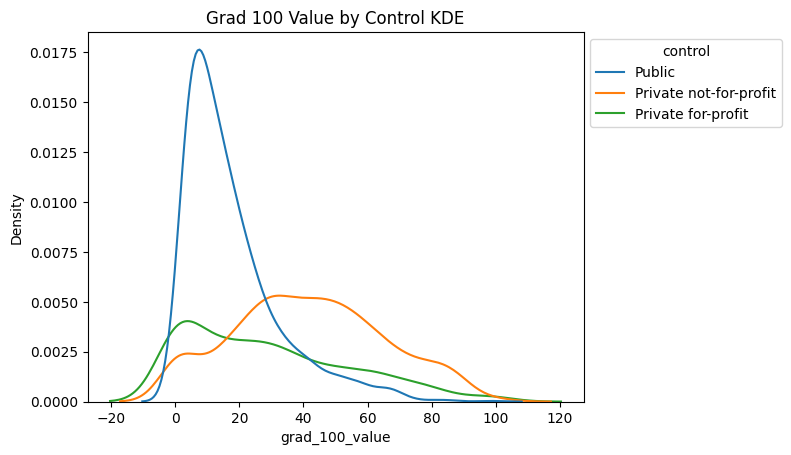

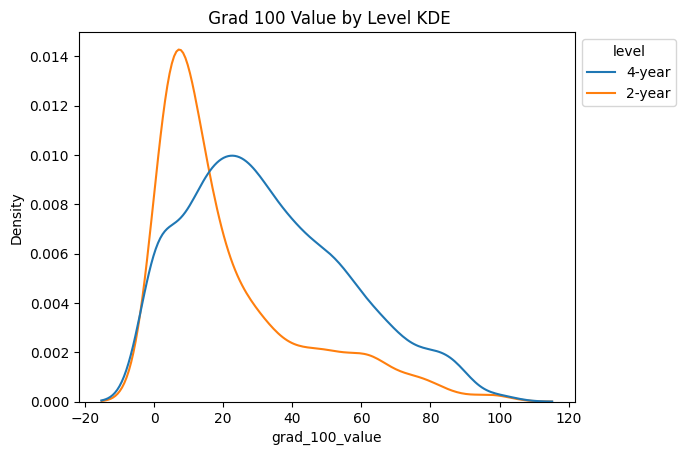

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1455.0,21.636151,21.645747,0.0,6.0,13.0,30.600,100.0
4-year,2012.0,33.230119,23.270160,0.0,15.2,29.7,49.225,100.0


In [21]:
# Question 2, (5)

df['grad'] = pd.to_numeric(df['grad_100_value'], errors='coerce')

ax = sns.kdeplot(data=df, x='grad', hue='control')
ax.set(title="Grad 100 Value by Control KDE", xlabel="grad_100_value")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

ax = sns.kdeplot(data=df, x='grad', hue='level')
ax.set(title=" Grad 100 Value by Level KDE", xlabel="grad_100_value")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

df.groupby('control')['grad'].describe()
df.groupby('level')['grad'].describe()

# 4 year colleges has the higher graduation rates. in the control KDE, there seems to be a similar trend of an increase then a decrease however, the height of these curves differ. 

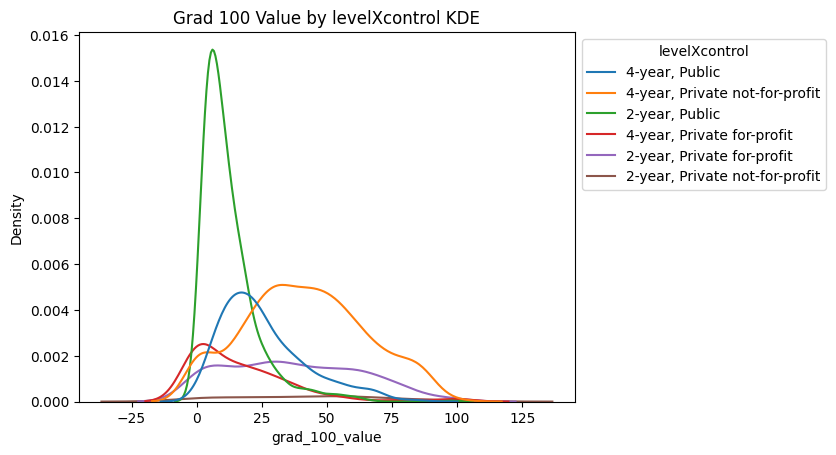

,count,mean,std,min,25%,50%,75%,max
levelXcontrol,,,,,,,,
"2-year, Private for-profit",461.0,37.197614,25.497380,0.0,15.800,33.9,57.800,100.0
"2-year, Private not-for-profit",68.0,41.913235,28.348302,0.0,16.225,44.4,61.200,100.0
"2-year, Public",926.0,12.400000,10.893600,0.0,5.100,9.4,16.175,97.8
"4-year, Private for-profit",318.0,17.382704,20.788525,0.0,0.000,12.5,26.325,100.0
"4-year, Private not-for-profit",1121.0,41.645674,23.243453,0.0,25.000,41.0,57.800,100.0
"4-year, Public",573.0,25.561082,16.403902,0.0,13.600,21.8,33.800,86.3


In [ ]:
# Question 2, (6)

df['levelXcontrol'] = df['level'] + ', ' + df['control']
ax = sns.kdeplot(data=df, x='grad', hue='levelXcontrol')
ax.set(title="Grad 100 Value by levelXcontrol KDE", xlabel="grad_100_value")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

df.groupby('levelXcontrol')['grad'].describe()

# 4 year, private not for profit had the best graduation rates. 


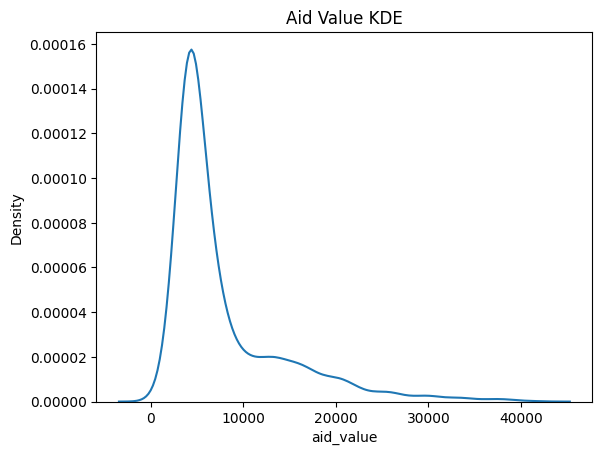

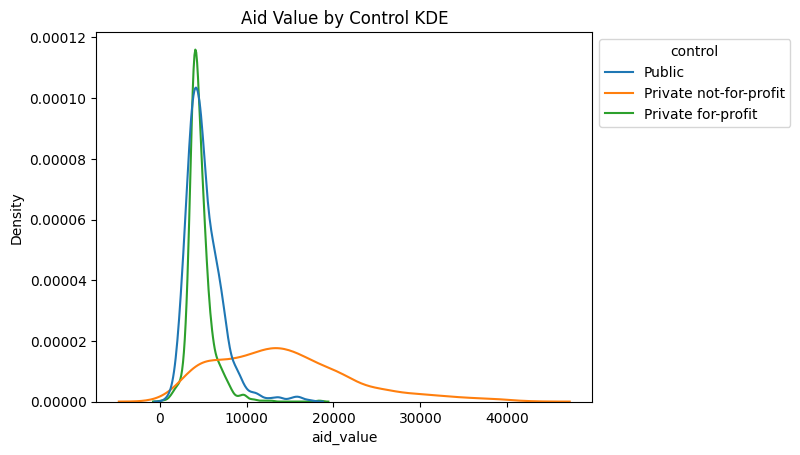

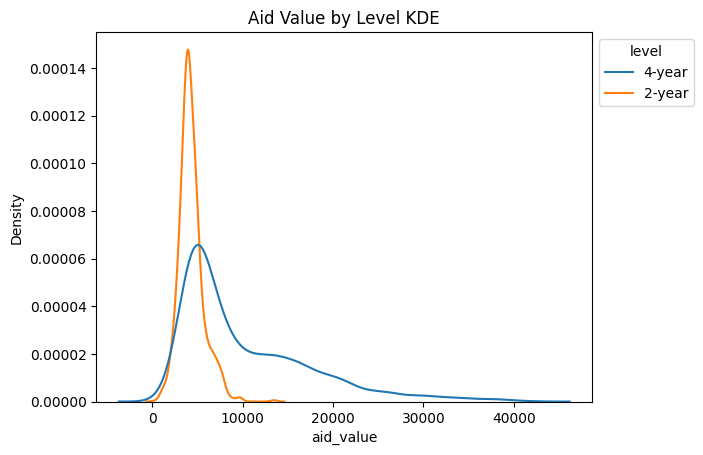

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1458.0,4310.878601,1384.045631,294.0,3485.5,4113.0,4890.0,13654.0
4-year,2339.0,10235.379222,7227.369167,902.0,4830.5,7222.0,14046.0,41580.0


In [ ]:
# Question 2, (7)

aid = pd.to_numeric(df['aid_value'], errors='coerce').dropna()

sns.kdeplot(aid)
plt.title("Aid Value KDE")
plt.show()

ax = sns.kdeplot(data=df, x='aid_value', hue='control')
ax.set(title="Aid Value by Control KDE", xlabel="aid_value")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

df.groupby('control')['aid_value'].describe()

ax = sns.kdeplot(data=df, x='aid_value', hue='level')
ax.set(title="Aid Value by Level KDE", xlabel="aid_value")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

df.groupby('level')['aid_value'].describe()

# There is not a lot of aid for private not for profit colleges because they don't make a lot of money therefore, there is not a lot to give. There is a median amount of money they give to students. probably a maximum set by these colleges. 

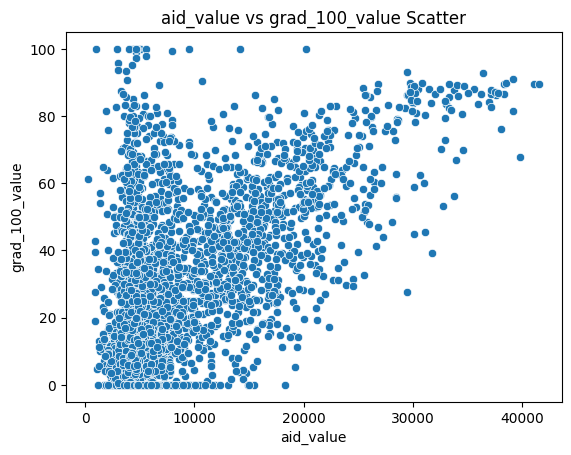

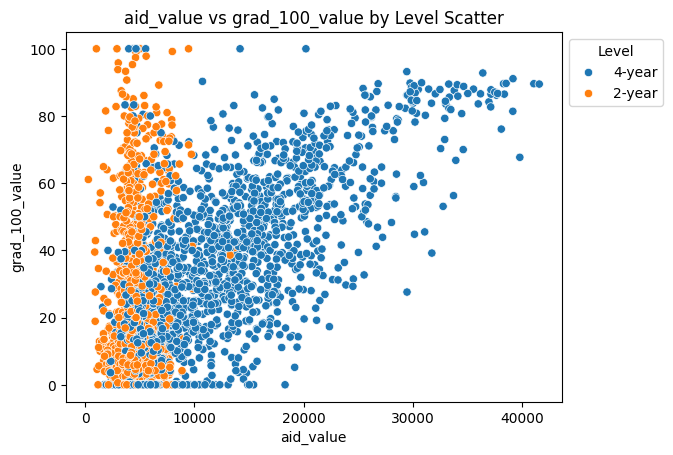

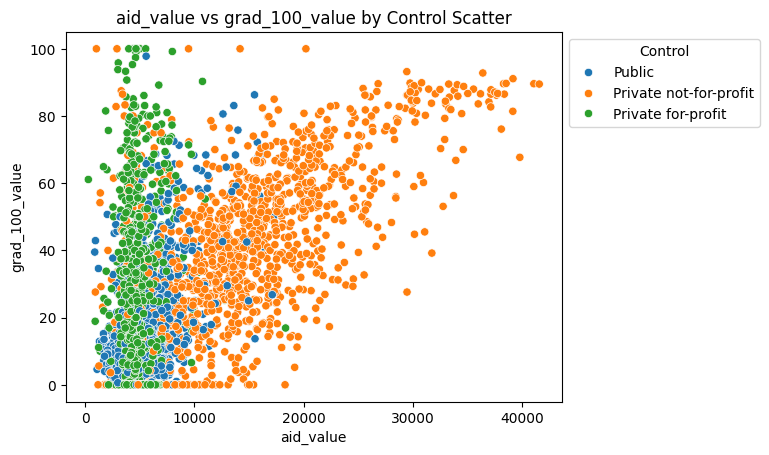

In [ ]:
# Question 2 (8)

df['grad'] = pd.to_numeric(df['grad_100_value'], errors='coerce')
df['aid'] = pd.to_numeric(df['aid_value'], errors='coerce')

sns.scatterplot(data=df, x='aid', y='grad')
plt.title("aid_value vs grad_100_value Scatter")
plt.xlabel("aid_value")
plt.ylabel("grad_100_value")
plt.show()

#There is a lot in one region and you can see a small patttern increasing in a curved way. 

sns.scatterplot(data=df, x='aid', y='grad', hue='level')
plt.title("aid_value vs grad_100_value by Level Scatter")
plt.xlabel("aid_value")
plt.ylabel("grad_100_value")
plt.legend(title='Level', bbox_to_anchor=(1, 1))
plt.show()

sns.scatterplot(data=df, x='aid', y='grad', hue='control')
plt.title("aid_value vs grad_100_value by Control Scatter")
plt.xlabel("aid_value")
plt.ylabel("grad_100_value")
plt.legend(title='Control', bbox_to_anchor=(1, 1))
plt.show()

# Aid seems to increase graduation rates the higest in 4 year, private not for profit institutions. 

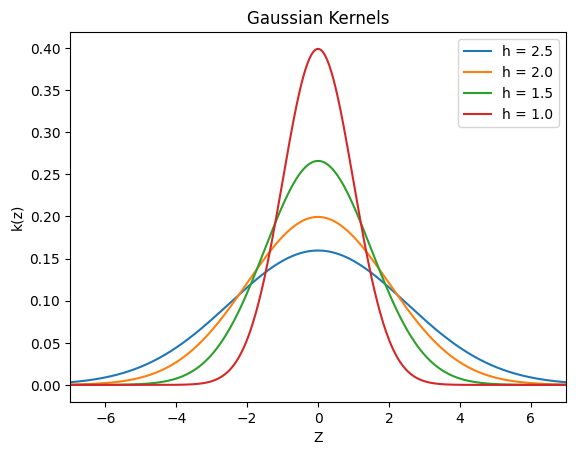

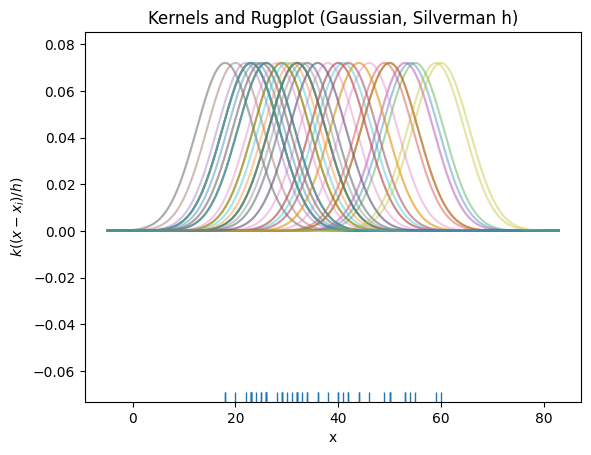

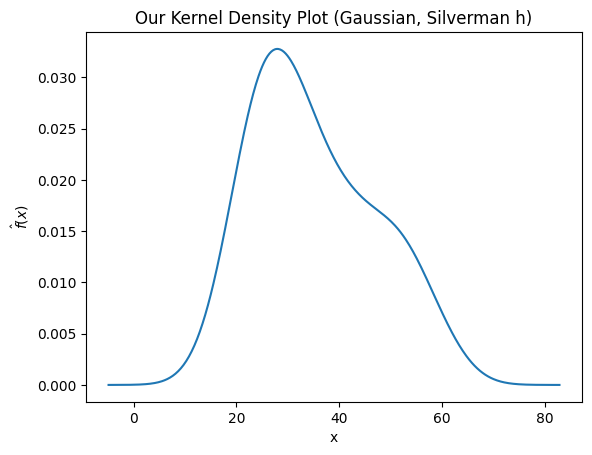

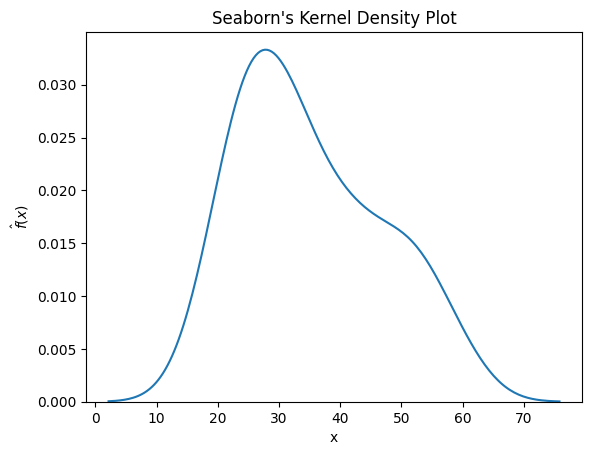

Plug-in Bandwidth: 5.541666089858518
Our Bandwidth: 3


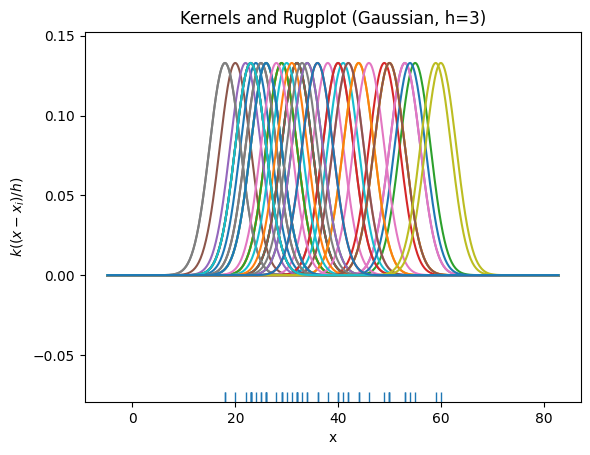

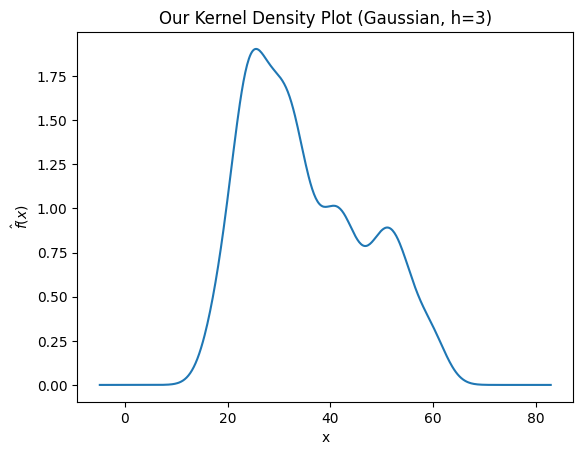

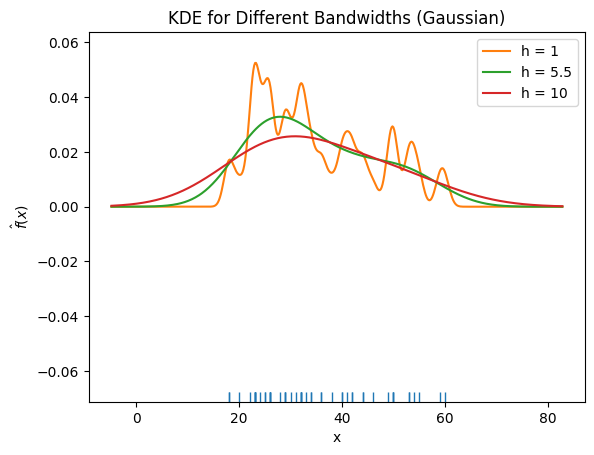

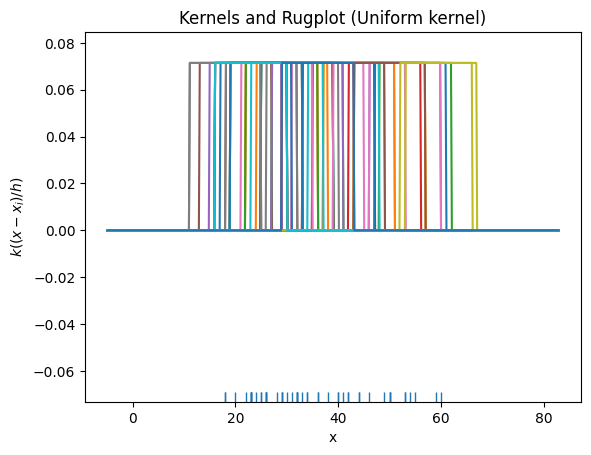

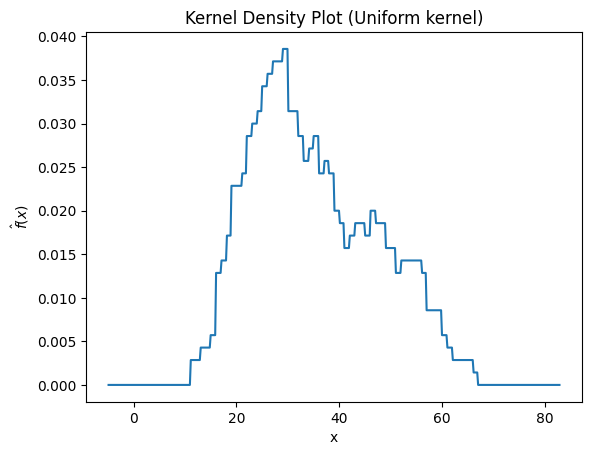

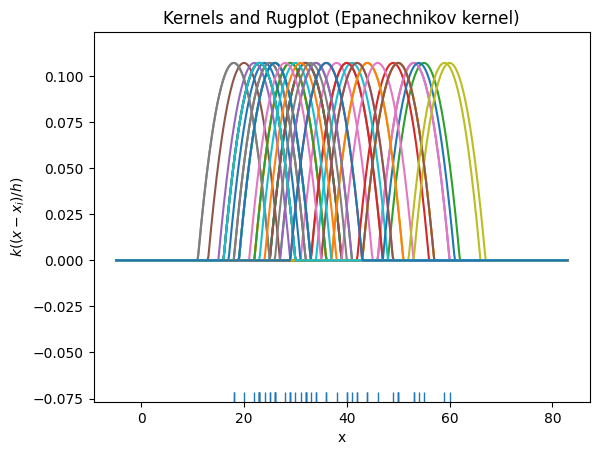

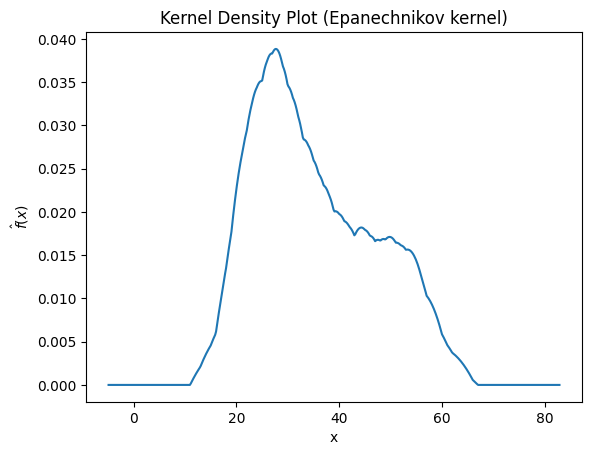

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# Load pretrial data (as in class)
# ------------------------------
df = pd.read_csv('./data/pretrial_data.csv')
x = df['age']
x = x[x.isna() == False].sample(50, random_state=10)
x = x.to_numpy()

# ------------------------------
# Setup: basic stats
# ------------------------------
sd = np.std(x)
N = len(x)
min_x = min(x)
max_x = max(x)

# ------------------------------
# Step 1: Gaussian Kernel Function and Demos
# ------------------------------
M = 500
grid = np.linspace(-7, 7, M)

def normal_kernel(center, bandwidth):
    density = np.exp(-(((grid - center)/bandwidth)**2)/2) / (bandwidth * np.sqrt(2 * np.pi))
    return density

# Compute normal kernels around 0 for various bandwidths
y_10 = normal_kernel(0, 1.0)
y_15 = normal_kernel(0, 1.5)
y_20 = normal_kernel(0, 2.0)
y_25 = normal_kernel(0, 2.5)

# Plot kernel functions
fig = sns.lineplot(x=grid, y=y_25, label='h = 2.5')
fig.set_xlim(-7, 7)
fig.set(title="Gaussian Kernels", xlabel='Z', ylabel='k(z)')
sns.lineplot(x=grid, y=y_20, label='h = 2.0')
sns.lineplot(x=grid, y=y_15, label='h = 1.5')
sns.lineplot(x=grid, y=y_10, label='h = 1.0')
plt.show()

# ------------------------------
# Step 2: KDE with Silverman's plug-in
# ------------------------------
h = 1.06 * sd * N**(-1/5)
h_s = h

grid = np.linspace(min_x - 2*sd, max_x + 2*sd, M)
kde = 0 * grid

fig = sns.rugplot(x)
fig.set(title="Kernels and Rugplot (Gaussian, Silverman h)", xlabel='x', ylabel='$k((x-x_i)/h)$')
for i in range(len(x)):
    density = np.exp(-(((grid - x[i])/h)**2)/2) / (h * np.sqrt(2 * np.pi))
    sns.lineplot(x=grid, y=density, alpha=.4)
    kde += density
kde = kde / N
plt.show()

fig = sns.lineplot(x=grid, y=kde)
fig.set(title="Our Kernel Density Plot (Gaussian, Silverman h)", xlabel='x', ylabel='$\\hat{f}(x)$')
plt.show()

# ------------------------------
# Step 3: Seaborn Comparison
# ------------------------------
fig = sns.kdeplot(x)
fig.set(title="Seaborn's Kernel Density Plot", xlabel='x', ylabel='$\\hat{f}(x)$')
plt.show()

# ------------------------------
# Step 4: Try h = 3
# ------------------------------
print("Plug-in Bandwidth:", h_s)
h = 3
print("Our Bandwidth:", h)

kde = 0 * grid
fig = sns.rugplot(x)
fig.set(title="Kernels and Rugplot (Gaussian, h=3)", xlabel='x', ylabel='$k((x-x_i)/h)$')
for i in range(len(x)):
    density = np.exp(-(((grid - x[i])/h)**2)/2) / (h * np.sqrt(2 * np.pi))
    sns.lineplot(x=grid, y=density)
    kde += density
plt.show()

fig = sns.lineplot(x=grid, y=kde)
fig.set(title="Our Kernel Density Plot (Gaussian, h=3)", xlabel='x', ylabel='$\\hat{f}(x)$')
plt.show()

# ------------------------------
# Step 5: Plot several bandwidths together
# ------------------------------
H = [1, 5.5, 10]
fig = sns.rugplot(x)
fig.set(title="KDE for Different Bandwidths (Gaussian)", xlabel='x', ylabel='$\\hat{f}(x)$')

for h in H:
    kde = 0 * grid
    for i in range(len(x)):
        density = np.exp(-(((grid - x[i])/h)**2)/2) / (h * np.sqrt(2 * np.pi))
        kde += density
    kde = kde / N
    sns.lineplot(x=grid, y=kde, label='h = ' + str(h))
plt.show()

# ------------------------------
# Step 6: Uniform Kernel
# ------------------------------
h = 7
kde = 0 * grid
fig = sns.rugplot(x)
fig.set(title="Kernels and Rugplot (Uniform kernel)", xlabel='x', ylabel='$k((x-x_i)/h)$')

for i in range(len(x)):
    z = (grid - x[i]) / h
    density = (np.abs(z) <= 1) * (0.5 / h)
    sns.lineplot(x=grid, y=density)
    kde += density
plt.show()

kde = kde / N
fig = sns.lineplot(x=grid, y=kde)
fig.set(title="Kernel Density Plot (Uniform kernel)", xlabel='x', ylabel='$\\hat{f}(x)$')
plt.show()

# ------------------------------
# Step 7: Epanechnikov Kernel
# ------------------------------
kde = 0 * grid
fig = sns.rugplot(x)
fig.set(title="Kernels and Rugplot (Epanechnikov kernel)", xlabel='x', ylabel='$k((x-x_i)/h)$')

for i in range(len(x)):
    z = (grid - x[i]) / h
    density = (0.75 * (1 - z**2) * (np.abs(z) <= 1)) / h
    sns.lineplot(x=grid, y=density)
    kde += density
plt.show()

kde = kde / N
fig = sns.lineplot(x=grid, y=kde)
fig.set(title="Kernel Density Plot (Epanechnikov kernel)", xlabel='x', ylabel='$\\hat{f}(x)$')
plt.show()
